In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../data/flats_feature_engg.csv').drop_duplicates()

In [5]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
0,maa bhagwati residency,0.45,sector 7,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,0,4,West,Relatively New,NaN,NaN,900.0,0,28
1,apna enclave,0.50,sector 3,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,0,1,West,Old Property,NaN,NaN,650.0,2,37
2,tulsiani easy in homes,0.40,sohna road,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,0,12,NaN,New Property,NaN,NaN,595.0,0,36
3,smart world orchard,1.47,sector 61,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,1,2,NaN,Under Construction,NaN,NaN,1200.0,0,76
4,parkwood westend,0.70,sector 92,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,1,5,NaN,Under Construction,1345.0,NaN,NaN,0,0


In [6]:
df.duplicated().sum()

np.int64(0)

1. Average Price per Sector (Sorted by Sector Number)

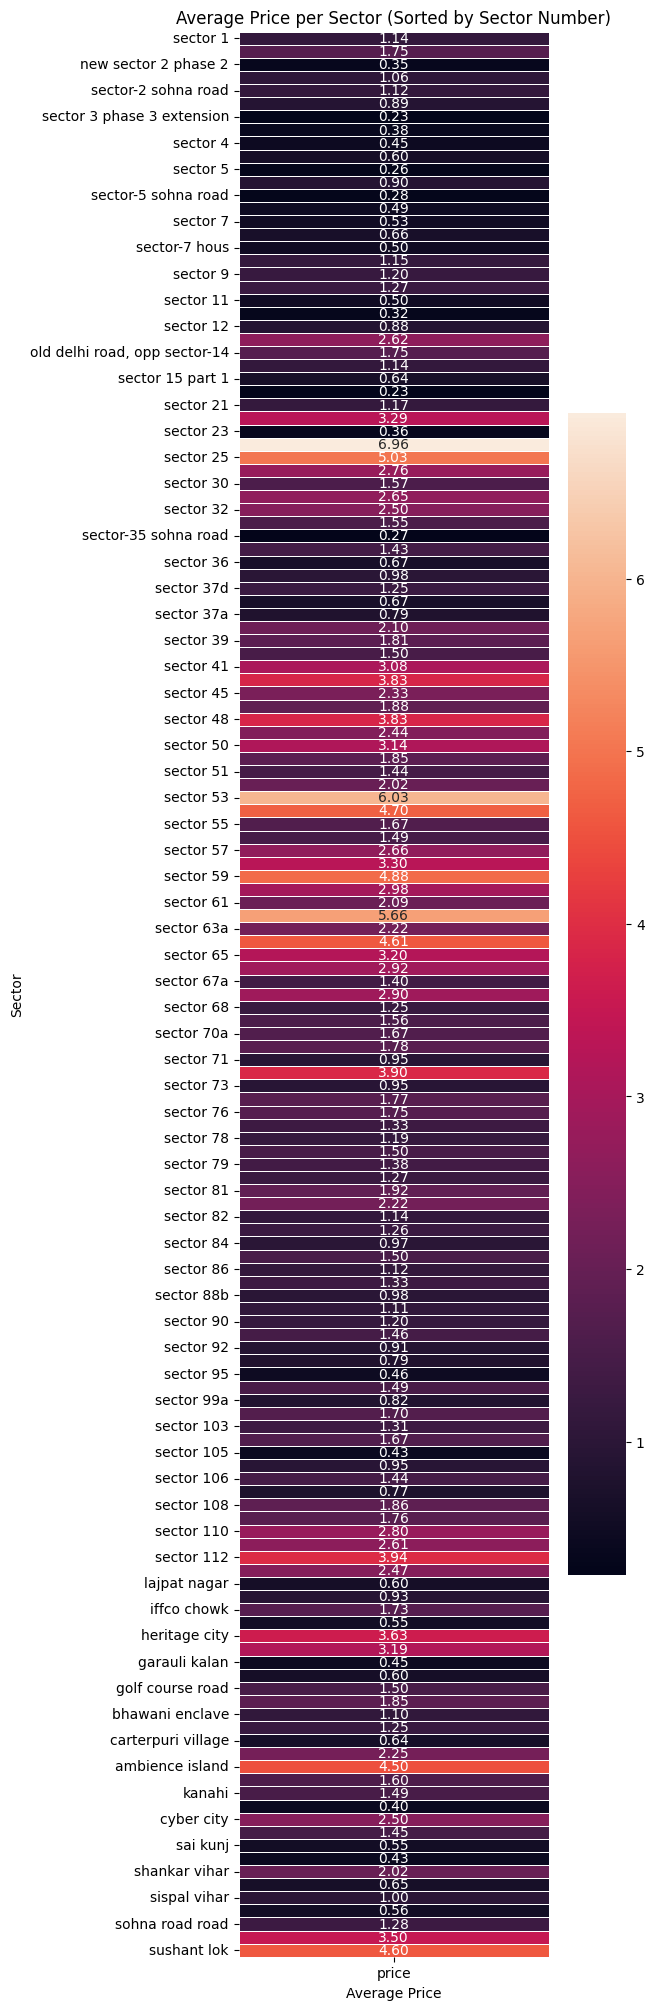

In [7]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

2. Average Price per Sector (Sorted by Sector)

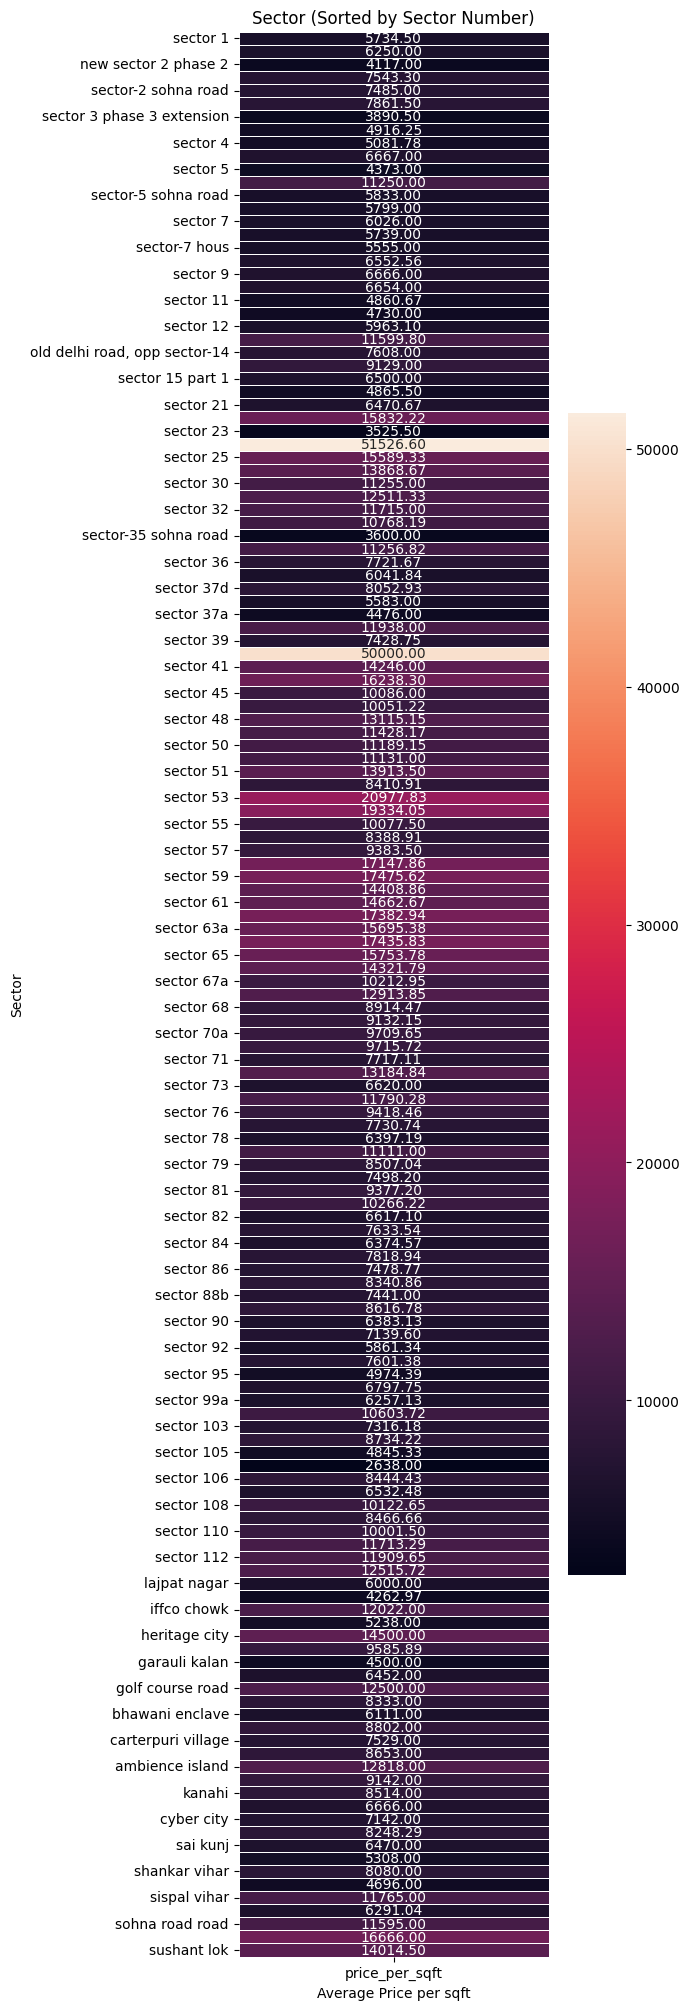

In [8]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

3. Average Luxury Score per Sector (Sorted by Sector)

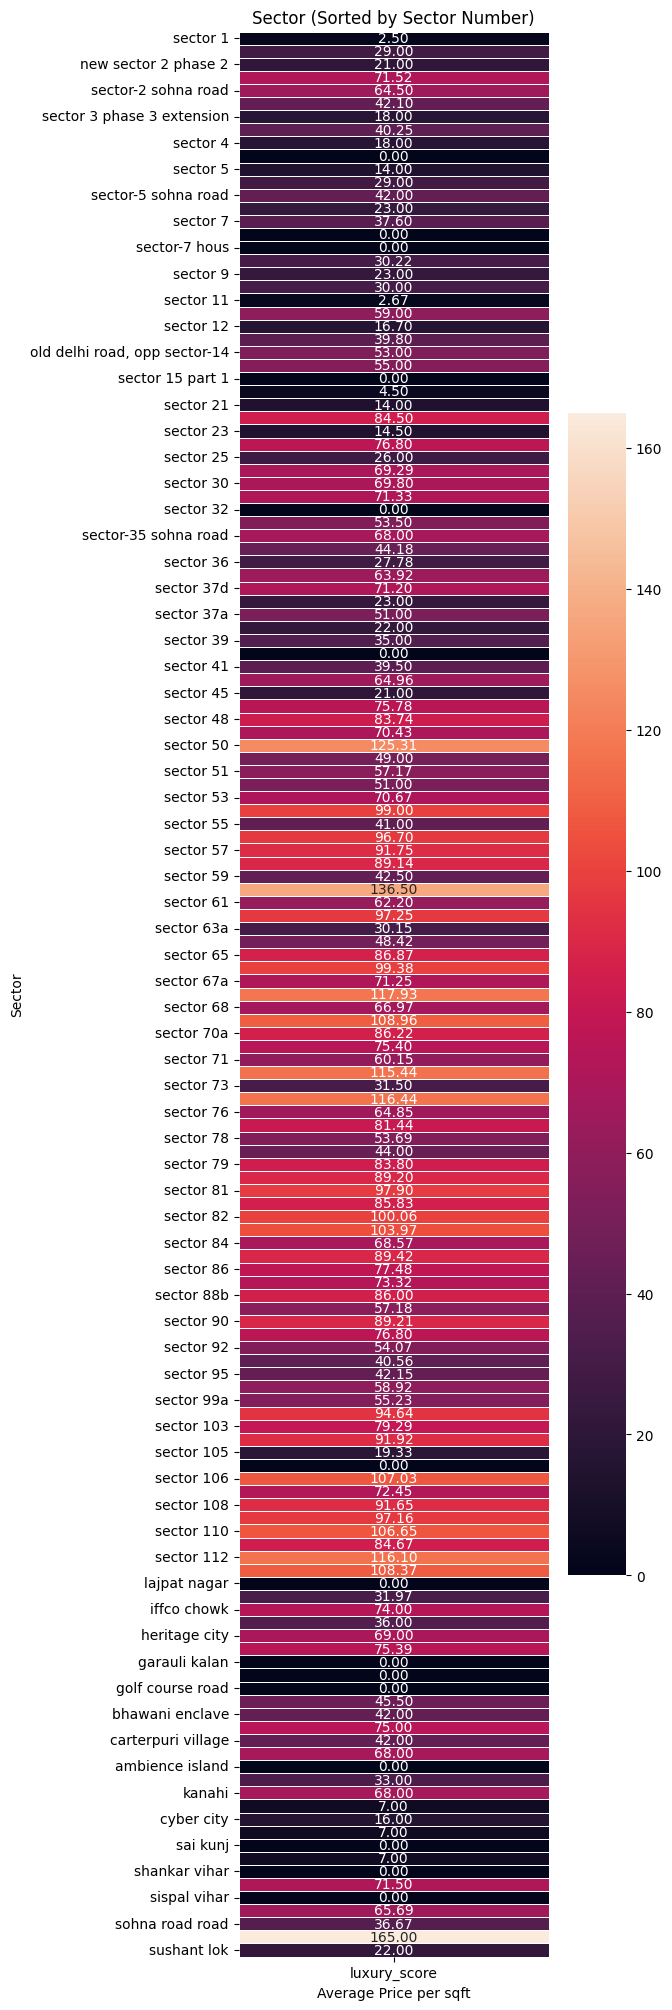

In [9]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

4. Correlation b/w Area and Price and Bedroom

In [12]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<Axes: xlabel='area', ylabel='price'>

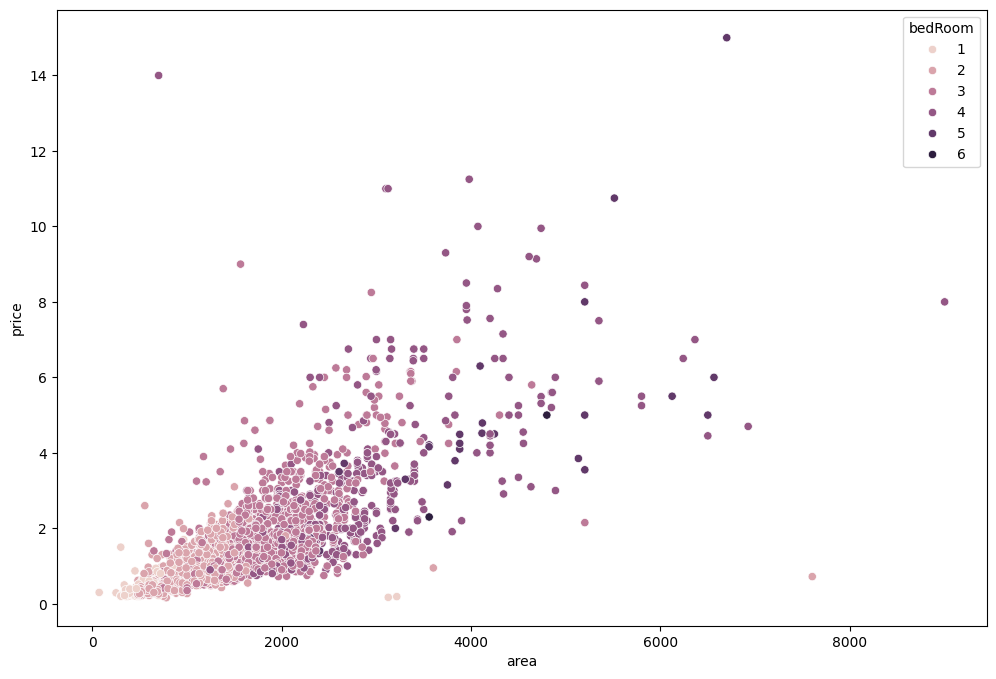

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'], y = df['price'], hue = df['bedRoom'])

5. Correlation b/w Area and Price and agePossession

<Axes: xlabel='area', ylabel='price'>

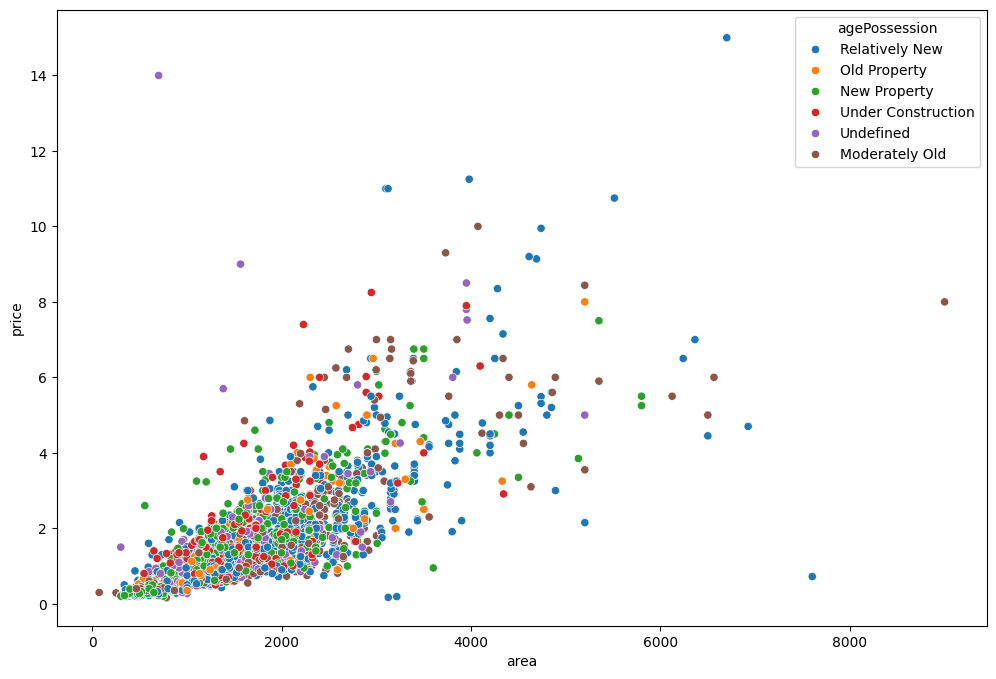

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'], y = df['price'], hue = df['agePossession'])

6. Correlation b/w Area and Price and furnishing_type

<Axes: xlabel='area', ylabel='price'>

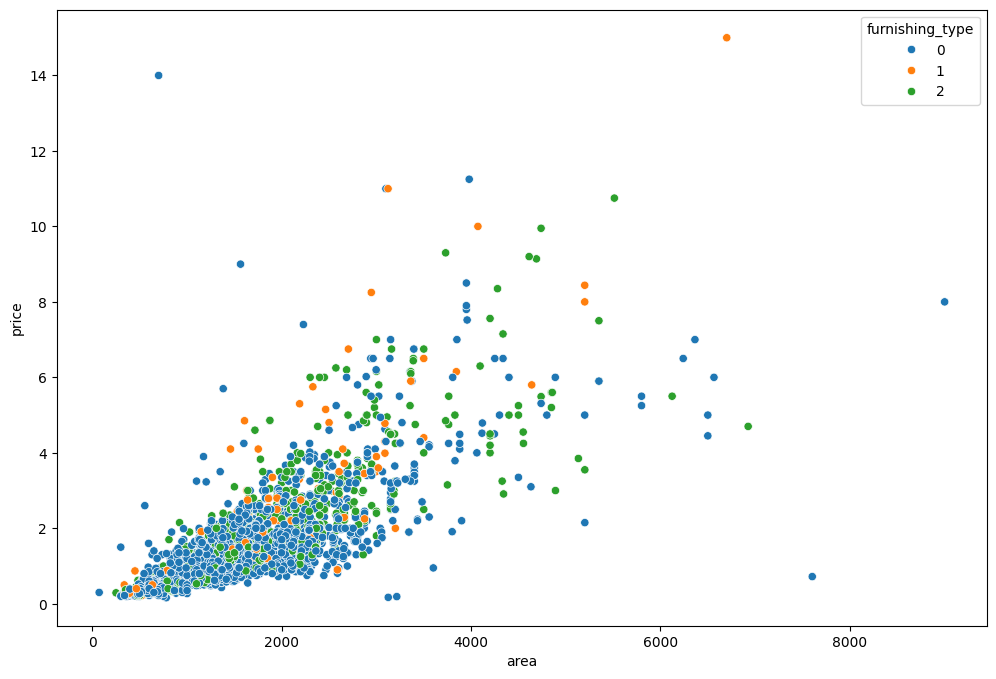

In [17]:
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'], y = df['price'], hue = df['furnishing_type'].astype('category'))

7. Bedroom vs Price

<Axes: xlabel='bedRoom', ylabel='price'>

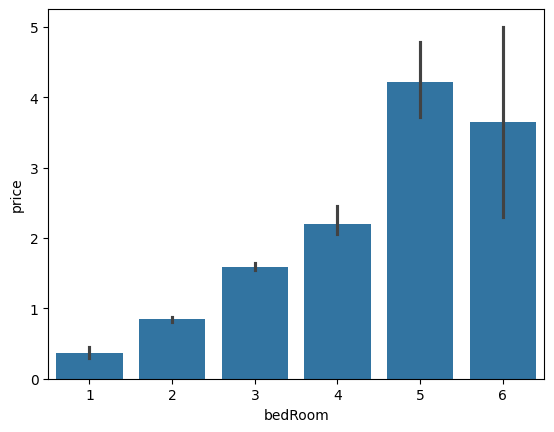

In [19]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

8. AgePossession vs Price

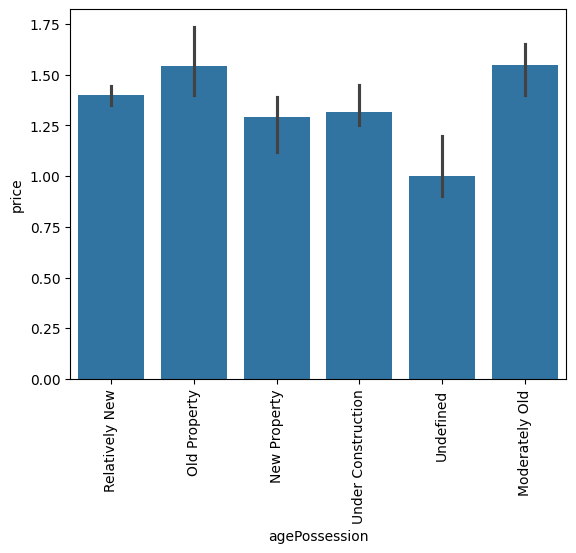

In [20]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

9. AgePossession vs Area

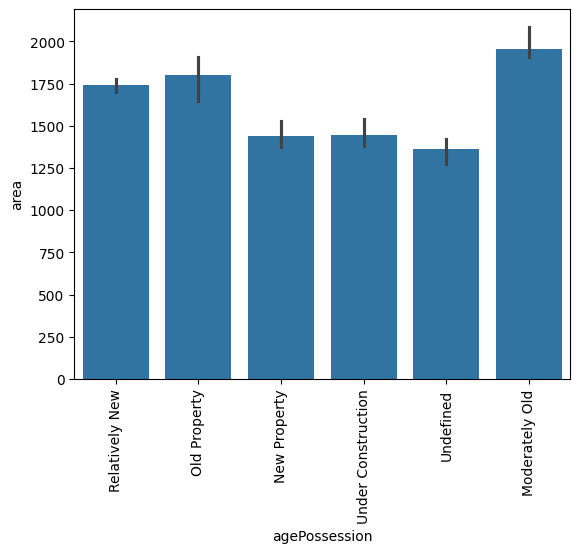

In [21]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

10. furnishing_type vs price

<Axes: xlabel='furnishing_type', ylabel='price'>

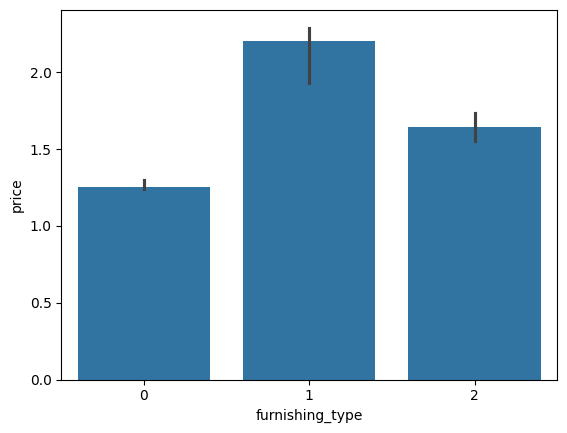

In [22]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

11. luxury_score vs price

<Axes: xlabel='luxury_score', ylabel='price'>

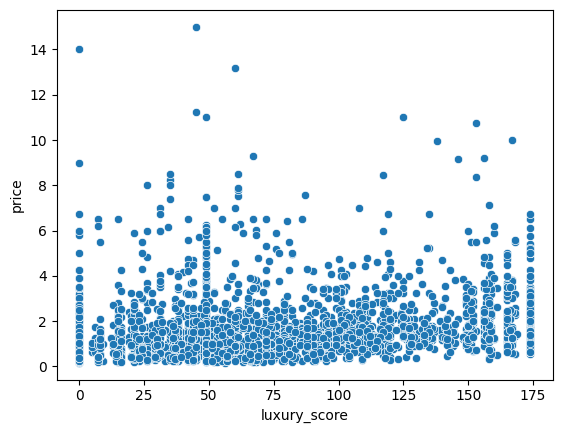

In [24]:
sns.scatterplot(x = df['luxury_score'], y = df['price'])

12. Correlation of each column with each column

<Axes: >

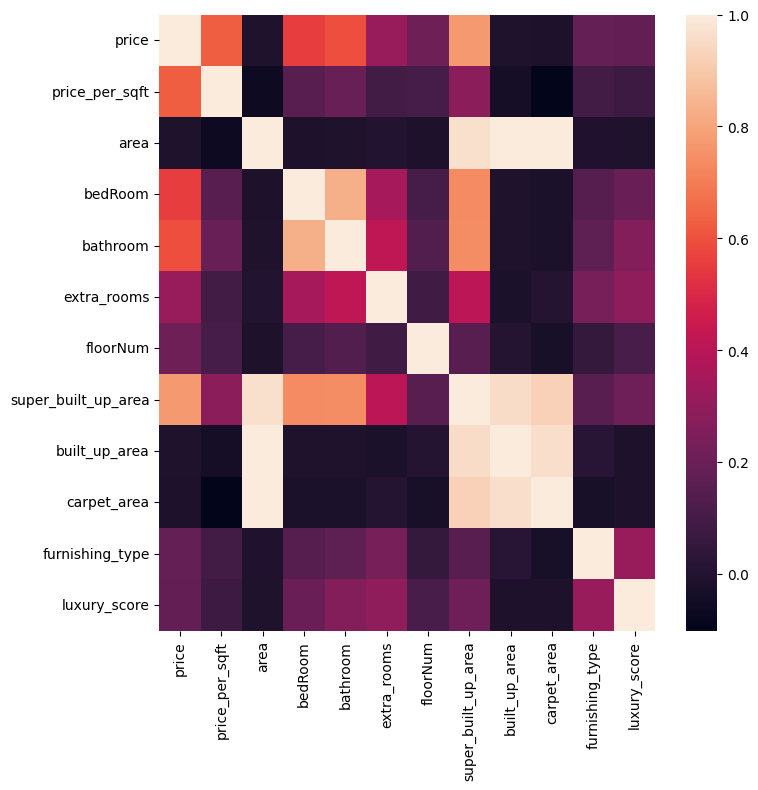

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True))

13. Correlation of price column with every other column and their importance

In [29]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.770083
price_per_sqft         0.629017
bathroom               0.591794
bedRoom                0.554157
extra_rooms            0.319612
floorNum               0.206142
furnishing_type        0.183470
luxury_score           0.178696
built_up_area         -0.012890
area                  -0.013117
carpet_area           -0.018163
Name: price, dtype: float64